In [17]:
#import necessary liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [18]:
#loading the dataset
df = pd.read_csv("adult")

In [19]:
#to view dataset
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.shape

(48842, 15)

In [32]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [33]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Index(['age', 'fnlwgt', 'education', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'workclass_others',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'occupation_others',
       '

In [34]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [20]:
# remove special characters from column
df["workclass"] = df["workclass"].replace("?","others")
df["occupation"] = df["occupation"].replace("?","others")

In [7]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,others,103497,Some-college,10,Never-married,others,Own-child,White,Female,0,0,30,United-States,<=50K


In [87]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [88]:
# check duplicate values...
df.columns[df.columns.duplicated()].tolist()


[]

In [89]:
# explore statistical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [21]:
# differentiate categorical and numerical features
categorical_cols = df.select_dtypes(include='object').columns

In [22]:
numerical_cols = df.select_dtypes(include = "int64").columns

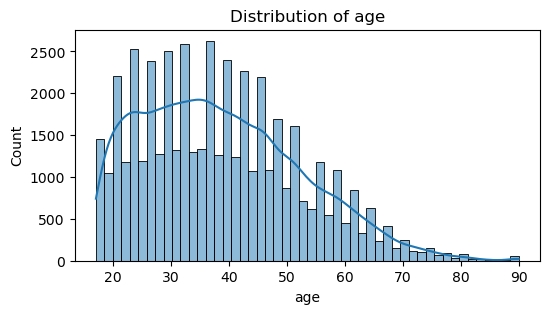

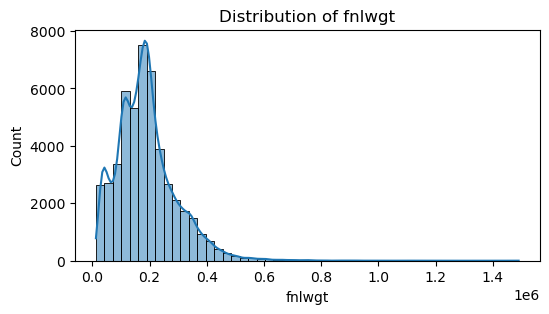

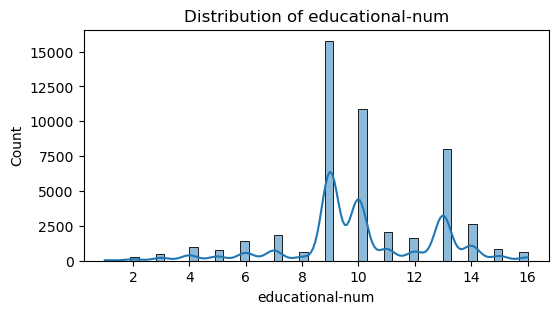

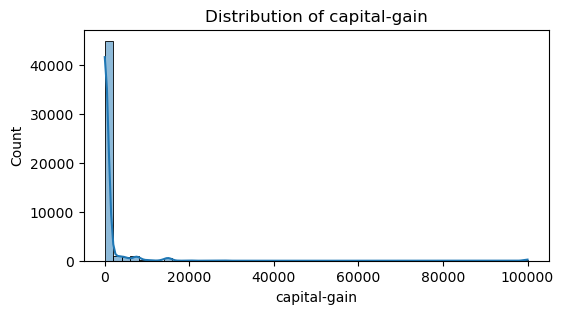

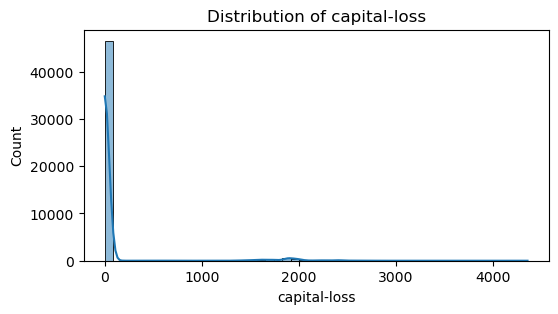

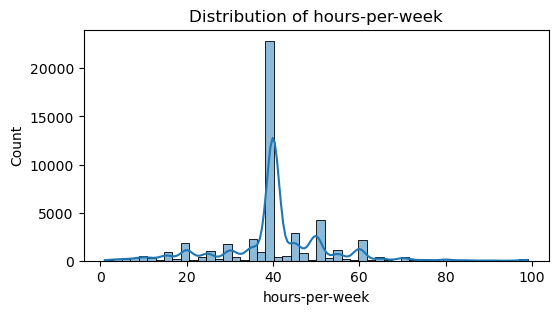

In [92]:
# to know the distribution of data
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

In [23]:
skew_vals = df[numerical_cols].skew().sort_values(ascending=False)
print(skew_vals)

capital-gain       11.894659
capital-loss        4.569809
fnlwgt              1.438892
age                 0.557580
hours-per-week      0.238750
educational-num    -0.316525
dtype: float64


In [24]:
log_cols = ['capital-gain', 'capital-loss', 'fnlwgt']
for col in log_cols:
    df[col] = np.log1p(df[col])

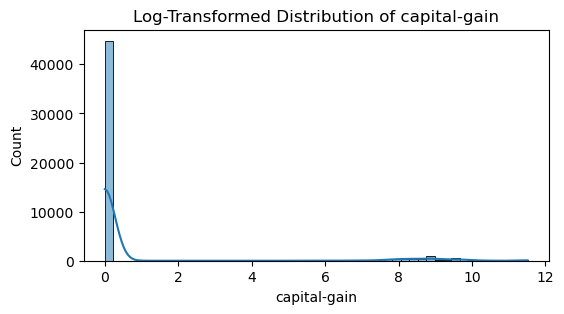

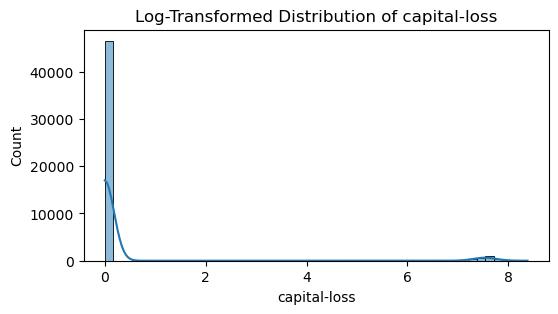

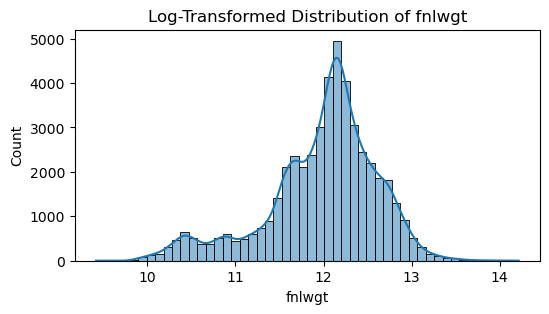

In [25]:
for col in log_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Log-Transformed Distribution of {col}')
    plt.show()

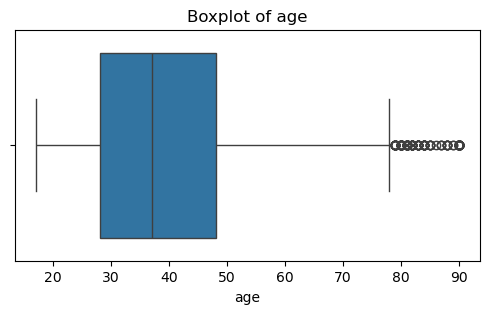

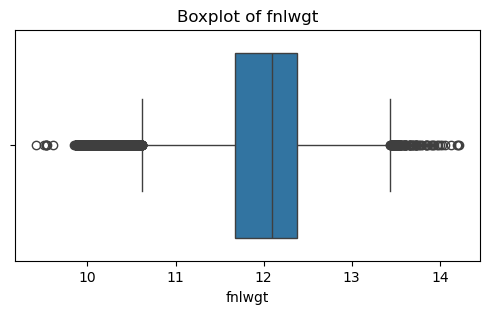

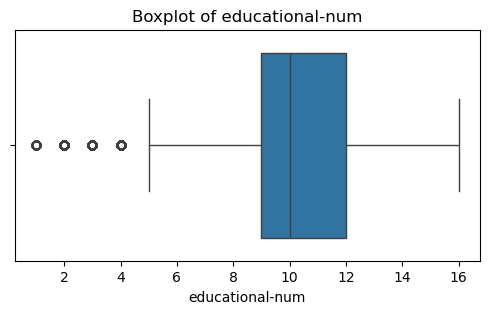

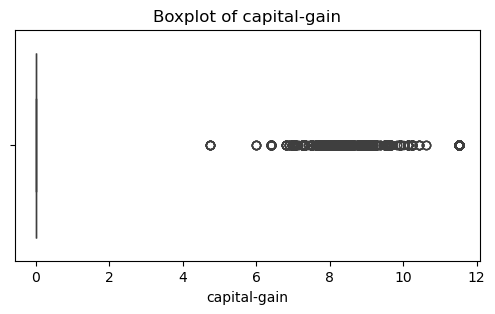

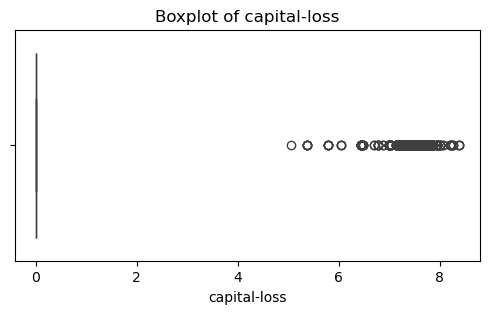

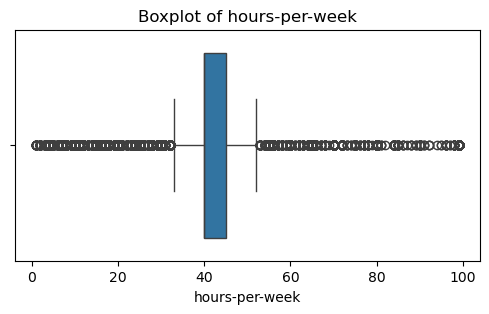

In [53]:
# checking for outliers:
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [26]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


In [27]:
for cols in numerical_cols:
    outliers_hours = detect_outliers_iqr(df, cols)
    print(len(outliers_hours))

216
2659
1794
4035
2282
13496


In [11]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    

In [28]:
categorical_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [29]:
numerical_cols

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [30]:
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include='number').columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [31]:
df.shape

(48842, 15)

In [32]:
education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th',
    '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc',
    'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'
]
ordinal_enc = OrdinalEncoder(categories=[education_order])
df['education'] = ordinal_enc.fit_transform(df[['education']])


In [33]:
df.drop(columns=['educational-num'], inplace=True,axis = 1)

In [34]:
categorical_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [35]:
label_encoders = {}
for col in ['gender', 'income']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [36]:
one_hot_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [37]:
df.shape

(48842, 86)

In [38]:
X = df.drop("income", axis=1)
y = df["income"]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

In [41]:
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, log_preds))
print(confusion_matrix(y_test, log_preds))
print(classification_report(y_test, log_preds))



Logistic Regression Results:
Accuracy: 0.8506500153546934
[[6946  533]
 [ 926 1364]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7479
           1       0.72      0.60      0.65      2290

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.85      9769



In [43]:
print("Training Accuracy:",log_model.score(X_train, y_train))
print("Test Accuracy:", log_model.score(X_test, y_test))

Training Accuracy: 0.8462365316203004
Test Accuracy: 0.8506500153546934


In [54]:
rf_model = RandomForestClassifier(200)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [55]:
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))



Random Forest Results:
Accuracy: 0.8631384993346299
[[6953  526]
 [ 811 1479]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      7479
           1       0.74      0.65      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



In [47]:
print("Training Accuracy:",rf_model.score(X_train, y_train))
print("Test Accuracy:", rf_model.score(X_test, y_test))


Training Accuracy: 0.999872034397154
Test Accuracy: 0.8617053946156208


In [42]:
# apply grid seach cv to get exact parameters because rf_model shows overfitting becuase it,s accuracy is muuch higher on training data with respect
#to test data

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy: 0.8639212391886145


In [51]:
best_params = grid.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [52]:
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [53]:
print("Training Accuracy:",final_model.score(X_train, y_train))
print("Test Accuracy:", final_model.score(X_test, y_test))

Training Accuracy: 0.8935070253115962
Test Accuracy: 0.8730678677449074


In [57]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.4/150.0 MB 16.8 MB/s eta 0:00:09
   -- ------------------------------------- 8.4/150.0 MB 23.6 MB/s eta 0:00:06
   ---- ----------------------------------- 15.2/150.0 MB 26.5 MB/s eta 0:00:06
   ------ --------------------------------- 22.8/150.0 MB 29.4 MB/s eta 0:00:05
   ------- -------------------------------- 28.8/150.0 MB 29.5 MB/s eta 0:00:05
   -------- ------------------------------- 30.4/150.0 MB 29.7 MB/s eta 0:00:05
   -------- ------------------------------- 30.4/150.0 MB 29.7 MB/s eta 0:00:05
   -------- ------------------------------- 30.4/150.0 MB 29.7 MB/s eta 0:00:05
   -------- ------------------------------- 30.4/150.0 MB 29.7 MB/s eta 0:00:05
   --------- ------------------------------ 35.7/150.0 MB 17.4 MB/s eta 0:00:07
   ---------- ----------------------------- 40.6/150.0 MB 18.1 MB/s eta 0:00:07
   ------------ --------------------------- 46.1/15

In [60]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 0.12038079639676527
R2 Score: 0.3292226093323314


In [62]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=3  # Adjust based on class imbalance
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8425632101545706
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7479
           1       0.62      0.87      0.72      2290

    accuracy                           0.84      9769
   macro avg       0.79      0.85      0.81      9769
weighted avg       0.87      0.84      0.85      9769



In [63]:
print("Training Accuracy:",model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Training Accuracy: 0.8586491950963581
Test Accuracy: 0.8425632101545706


In [64]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

ensemble = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=42)),
    ('lr', LogisticRegression(max_iter=1000)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
], voting='soft')

ensemble.fit(X_train, y_train)
print("Ensemble Test Accuracy:", ensemble.score(X_test, y_test))


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Ensemble Test Accuracy: 0.8768553587880029


In [65]:
print("Training Accuracy:",ensemble.score(X_train, y_train))
print("Test Accuracy:", ensemble.score(X_test, y_test))

Training Accuracy: 0.9323573823356281
Test Accuracy: 0.8768553587880029


#### This ensemble model perform explicitely well on real world data using  voting ensemble technique

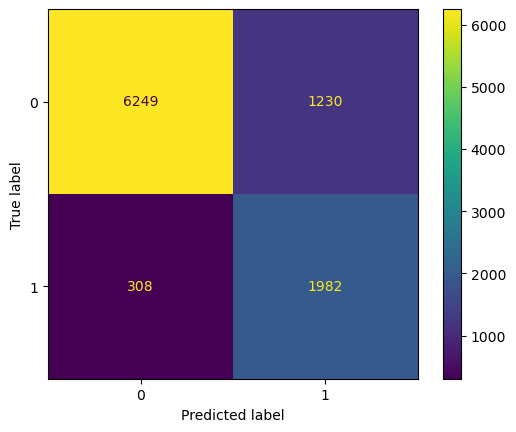

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


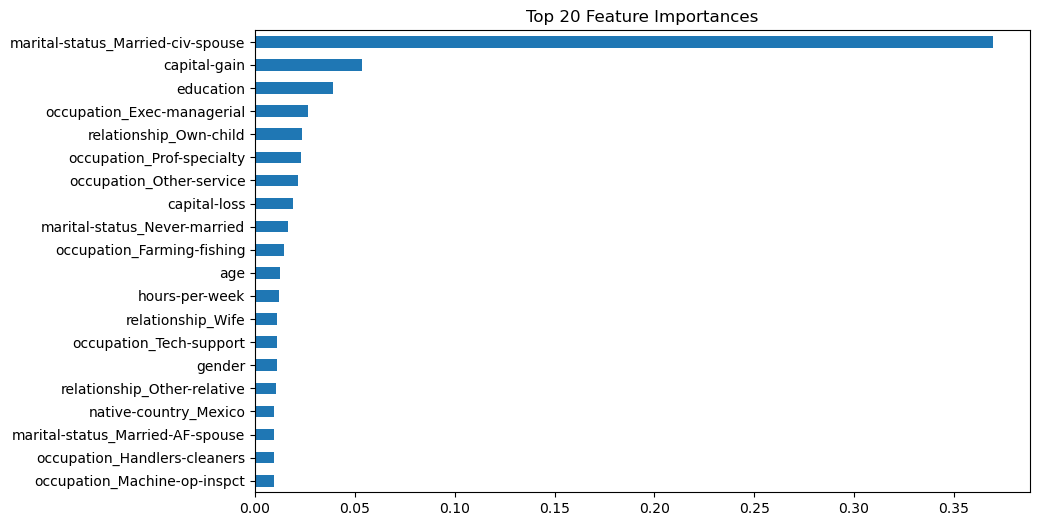

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10,6))
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [72]:
# Exporting the model

import joblib
joblib.dump(model, 'xgboost_salary_classifier.pkl')


['xgboost_salary_classifier.pkl']

In [73]:
model = joblib.load('xgboost_salary_classifier.pkl')


In [74]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)